In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
raw_dir = Path("artifacts/raw")

train_ds = (
    pd.read_csv(raw_dir / "train.csv")
    .sort_values(["time", "row", "col"])
    .reset_index(drop=True)
)

train_ds.head()

,time,row,col,demand
0,0,0,1,0
1,0,0,2,5
2,0,0,7,33
3,0,1,3,19
4,0,1,4,14


In [3]:
train_ds = train_ds.assign(
    hour_of_day=train_ds["time"] % 24, day=train_ds["time"] // 24
)
train_ds.head()

,time,row,col,demand,hour_of_day,day
0,0,0,1,0,0,0
1,0,0,2,5,0,0
2,0,0,7,33,0,0
3,0,1,3,19,0,0
4,0,1,4,14,0,0


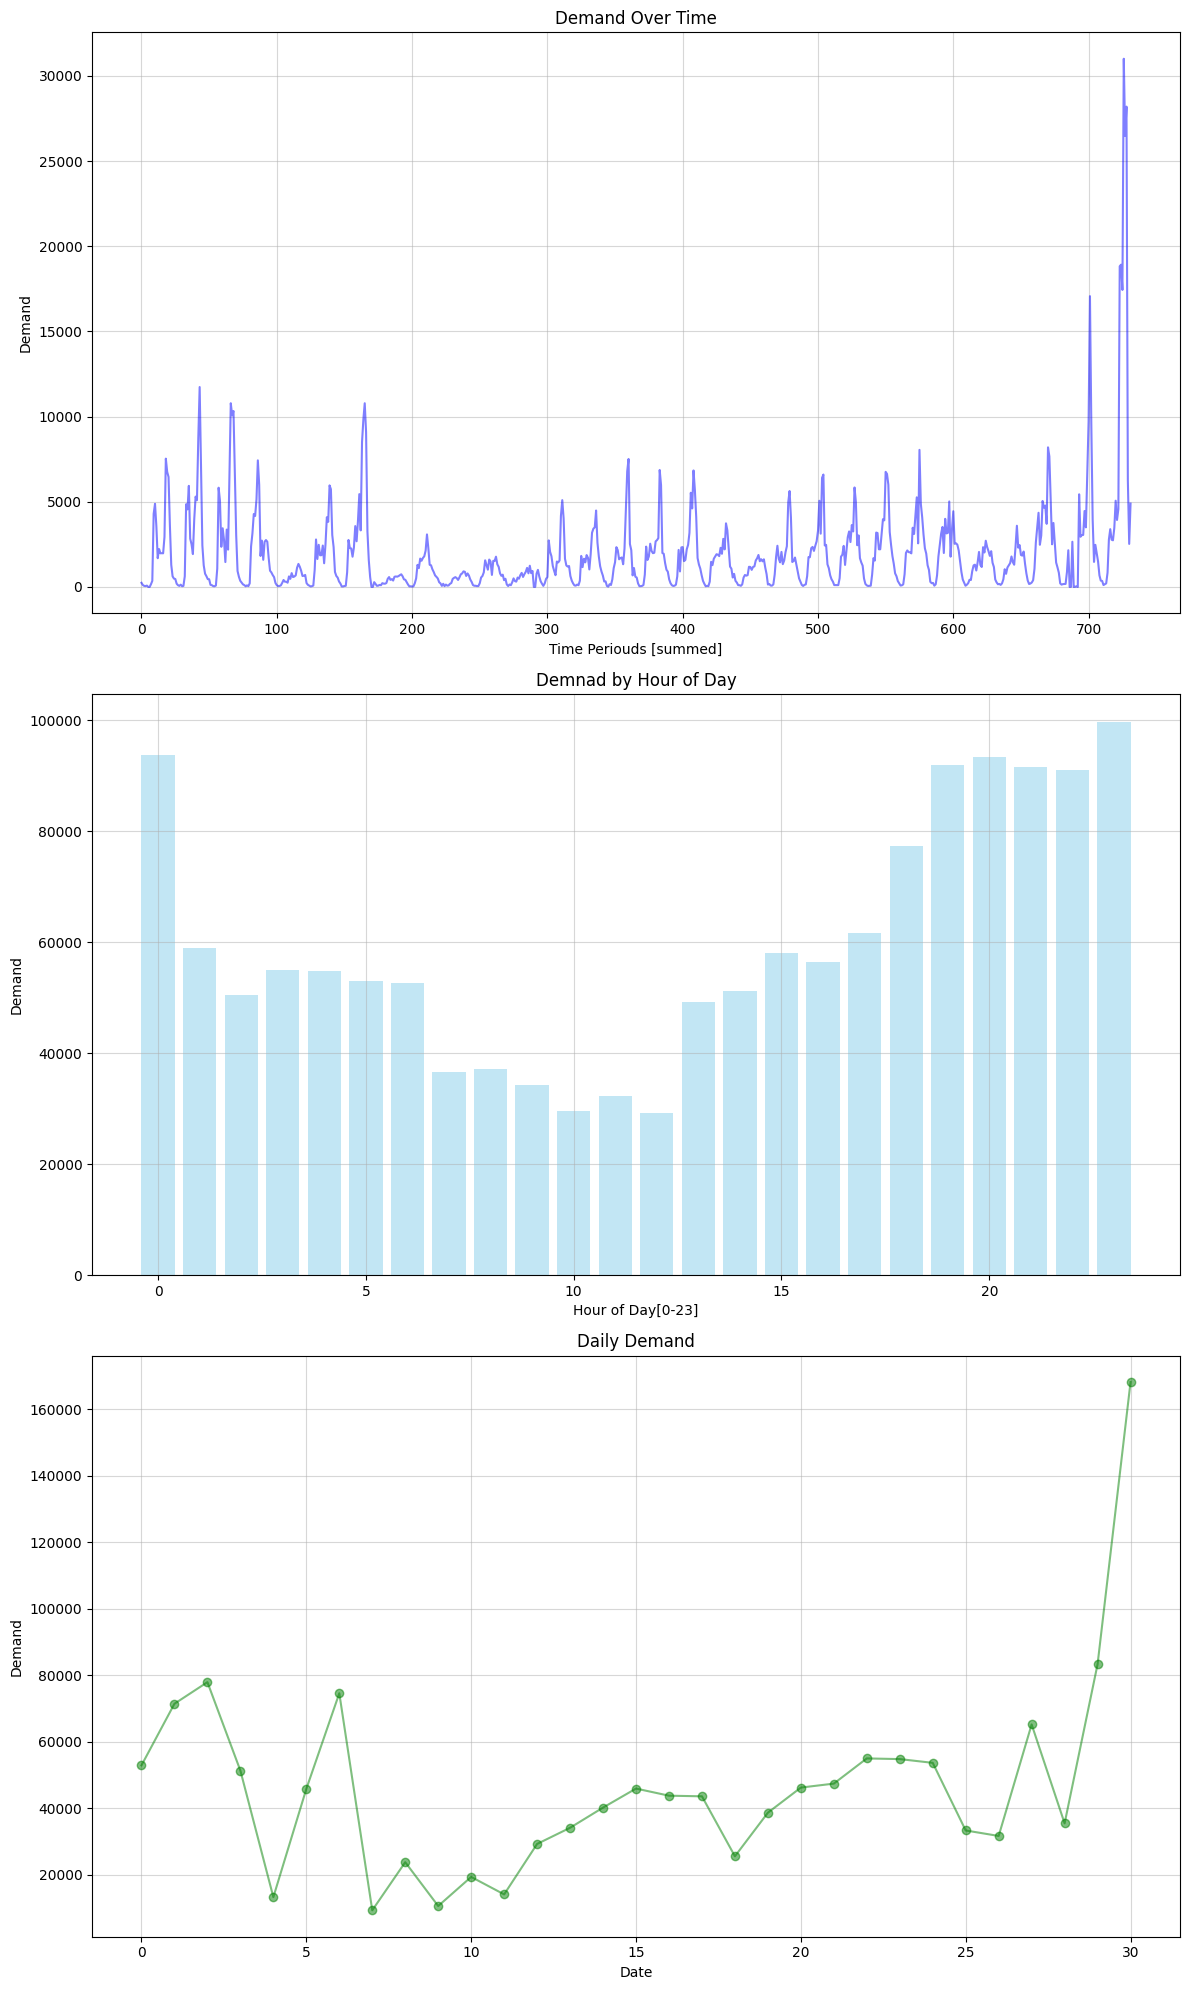

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))

# plot 1: Demand Over Time (summed)
demand_over_time = train_ds.groupby(by="time")["demand"].sum()
ax1.plot(demand_over_time.index, demand_over_time.values, "b-", alpha=0.5)
ax1.set_title("Demand Over Time")
ax1.set_xlabel("Time Periouds [summed]")
ax1.set_ylabel("Demand")
ax1.grid(True, alpha=0.5)


# plot 2: Demnad by Hour of Day
hourly_demand = train_ds.groupby("hour_of_day")["demand"].sum()
ax2.bar(hourly_demand.index, hourly_demand.values, color="skyblue", alpha=0.5)
ax2.set_title("Demnad by Hour of Day")
ax2.set_xlabel("Hour of Day[0-23]")
ax2.set_ylabel("Demand")
ax2.grid(True, alpha=0.5)

# plot 3: Daily Demand
daily_demand = train_ds.groupby("day")["demand"].sum()
ax3.plot(daily_demand.index, daily_demand.values, "g-", marker="o", alpha=0.5)
ax3.set_title("Daily Demand")
ax3.set_xlabel("Date")
ax3.set_ylabel("Demand")
ax3.grid(True, alpha=0.5)




plt.tight_layout()

In [34]:
shifts = range(24)
best_shift = 0
max_variance = float("-inf")

for shift in shifts:
    df_temp = train_ds.copy()
    df_temp["hour_of_day"] = (df_temp["time"] + shift) % 24

    peak_demand = df_temp[df_temp["hour_of_day"].isin([17, 18])]["demand"].sum()
    off_demand = df_temp[df_temp["hour_of_day"].isin([3, 4])]["demand"].sum()
    variance = peak_demand - off_demand

    if variance > max_variance:
        max_variance = variance
        best_shift = shift

train_ds["hour_of_day"] = (train_ds["time"] + best_shift) % 24
train_ds["day"] = (train_ds["time"] + best_shift) // 24

print(f"Best shift found {best_shift} hours")

Best shift found 18 hours


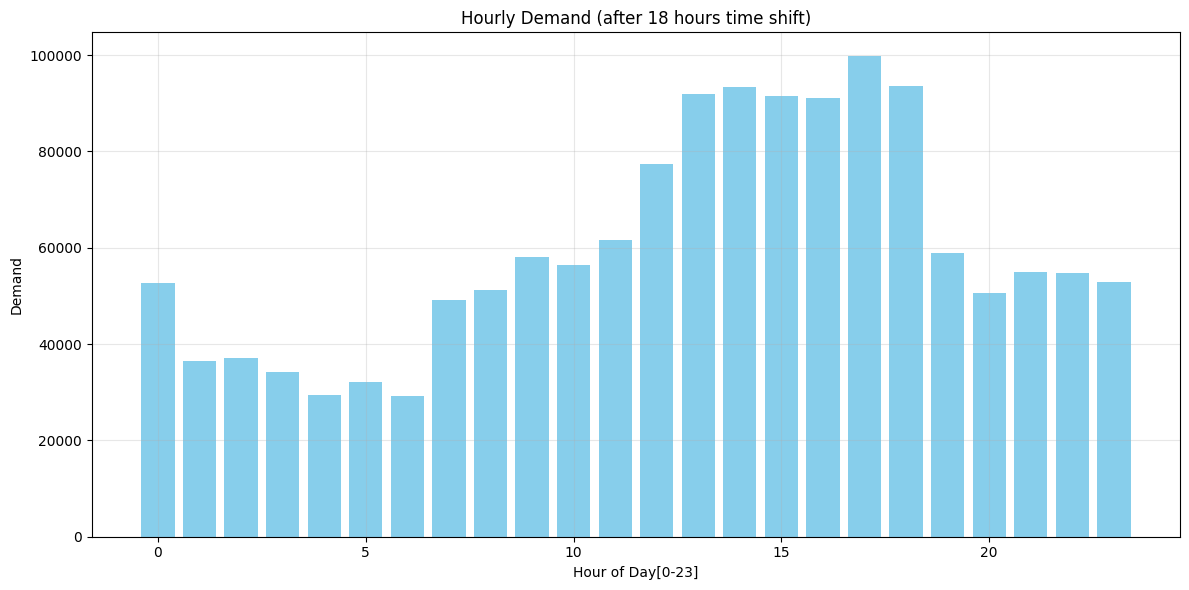

In [39]:
plt.figure(figsize=(12, 6))

hourly_demand = train_ds.groupby("hour_of_day")["demand"].sum()
plt.bar(hourly_demand.index, hourly_demand.values, color="skyblue")
plt.xlabel("Hour of Day[0-23]")
plt.ylabel("Demand")
plt.title("Hourly Demand (after 18 hours time shift)")
plt.grid(True, alpha=0.3)
plt.tight_layout()